In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [6]:
book_genre  = pd.read_csv('Amazon_Books_Scraping/Books_df.csv')

In [7]:
book_all = pd.read_csv('archive (6)/Books Data with Category Language and Summary/Preprocessed_data.csv', encoding='latin-1')

In [8]:
book_genre.head(2)

,Unnamed: 0,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated,URLs
0,0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock...
1,1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Ste...


In [9]:
book_all.head(2)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada


In [10]:
books_merged_all = pd.merge(book_all, book_genre[['Title', 'Author', 'Main Genre', 'Sub Genre']], 
                        left_on=['book_title', 'book_author'], 
                        right_on=['Title', 'Author'], 
                        how='left')

# Afficher les premières lignes pour vérifier
books_merged_all.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,...,Summary,Language,Category,city,state,country,Title,Author,Main Genre,Sub Genre
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa,NaN,NaN,NaN,NaN
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada,NaN,NaN,NaN,NaN
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada,NaN,NaN,NaN,NaN
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada,NaN,NaN,NaN,NaN


In [11]:
books_with_genre_all = books_merged_all[books_merged_all['Main Genre'].notna()]
books_with_genre_all

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,...,Summary,Language,Category,city,state,country,Title,Author,Main Genre,Sub Genre
35871,35871,254,"minneapolis, minnesota, usa",24.0000,0451524934,9,1984,George Orwell,1990.0,Signet Book,...,Winston Smith is a worker at the Ministry of T...,en,['London (England)'],minneapolis,minnesota,usa,1984,George Orwell,Literature & Fiction,Classic Fiction
35872,35871,254,"minneapolis, minnesota, usa",24.0000,0451524934,9,1984,George Orwell,1990.0,Signet Book,...,Winston Smith is a worker at the Ministry of T...,en,['London (England)'],minneapolis,minnesota,usa,1984,George Orwell,Society & Social Sciences,Anthropology
35873,35872,1706,"olympia, washington, usa",26.0000,0451524934,10,1984,George Orwell,1990.0,Signet Book,...,Winston Smith is a worker at the Ministry of T...,en,['London (England)'],olympia,washington,usa,1984,George Orwell,Literature & Fiction,Classic Fiction
35874,35872,1706,"olympia, washington, usa",26.0000,0451524934,10,1984,George Orwell,1990.0,Signet Book,...,Winston Smith is a worker at the Ministry of T...,en,['London (England)'],olympia,washington,usa,1984,George Orwell,Society & Social Sciences,Anthropology
35875,35873,2179,"sunderland, massachusetts, usa",30.0000,0451524934,8,1984,George Orwell,1990.0,Signet Book,...,Winston Smith is a worker at the Ministry of T...,en,['London (England)'],sunderland,massachusetts,usa,1984,George Orwell,Literature & Fiction,Classic Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025116,1023707,264149,"el puerto de santa maria, cadiz, spain",25.0000,8423328651,10,1984,George Orwell,1998.0,La Marca Editora,...,9,9,9,el puerto de santa maria,cadiz,spain,1984,George Orwell,Literature & Fiction,Classic Fiction
1025117,1023707,264149,"el puerto de santa maria, cadiz, spain",25.0000,8423328651,10,1984,George Orwell,1998.0,La Marca Editora,...,9,9,9,el puerto de santa maria,cadiz,spain,1984,George Orwell,Society & Social Sciences,Anthropology
1025118,1023708,274282,"barcelona, alabama, spain",24.0000,8423328651,10,1984,George Orwell,1998.0,La Marca Editora,...,9,9,9,barcelona,alabama,spain,1984,George Orwell,Literature & Fiction,Classic Fiction
1025119,1023708,274282,"barcelona, alabama, spain",24.0000,8423328651,10,1984,George Orwell,1998.0,La Marca Editora,...,9,9,9,barcelona,alabama,spain,1984,George Orwell,Society & Social Sciences,Anthropology


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


In [13]:
# Colonnes à utiliser pour la régression
features = ['age', 'country', 'Language', 'Main Genre', 'Sub Genre']
target = 'rating'

# Nettoyage : suppression des lignes incomplètes
books_merged_all = books_merged_all.dropna(subset=features + [target])

# Séparation des variables d’entrée et de sortie
X = books_merged_all[features]
y = books_merged_all[target]


In [14]:
# Colonnes catégorielles et numériques
categorical = ['country', 'Language', 'Main Genre', 'Sub Genre']
numeric = ['age']

# Prétraitement + modèle
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE du modèle : {rmse:.2f}")


RMSE du modèle : 4.38


/Users/namiepajot/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
# Exemple de profil utilisateur
profil_utilisateur = {
    'age': 25,
    'country': 'usa',
    'Language': 'en',
    'Main Genre': 'Literature & Fiction',
    'Sub Genre': 'Classic Fiction'
}

# Copie du dataset avec livres uniques
livres = books_merged_all.drop_duplicates(subset='isbn').copy()

# Appliquer le profil utilisateur à tous les livres
for feature in features:
    livres[feature] = profil_utilisateur[feature]

# Prédire les notes
livres['predicted_rating'] = model.predict(livres[features])

# Top 10 recommandations
recommandations = livres.sort_values(by='predicted_rating', ascending=False)
recommandations[['book_title', 'book_author', 'predicted_rating']].head(10)


,book_title,book_author,predicted_rating
35871,1984,George Orwell,3.933353
820094,Zen in the Martial Arts,Joe Hyams,3.933353
827503,Ways of Seeing,John Berger,3.933353
836835,The Secret Garden,Frances Hodgson Burnett,3.933353
838641,Zen in the Art of Archery,Eugen Herrigel,3.933353
842565,The Time Machine,H. G. Wells,3.933353
848015,The Time Machine,H. G. Wells,3.933353
850904,Metamorphosis,Franz Kafka,3.933353
851172,The Secret Garden,Frances Hodgson Burnett,3.933353
858655,The Secret Garden,Frances Hodgson Burnett,3.933353


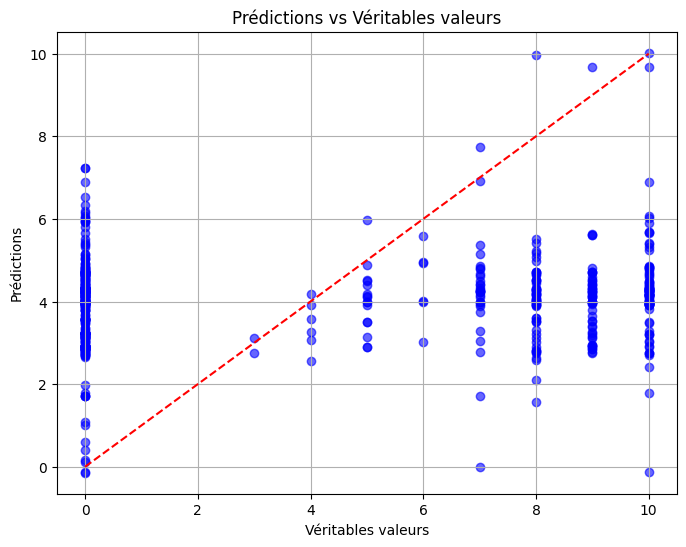

In [17]:
import matplotlib.pyplot as plt

# Visualiser les prédictions vs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, 10], [0, 10], color='red', linestyle='--')  # Ligne de parfaite correspondance
plt.title("Prédictions vs Véritables valeurs")
plt.xlabel("Véritables valeurs")
plt.ylabel("Prédictions")
plt.grid(True)
plt.show()


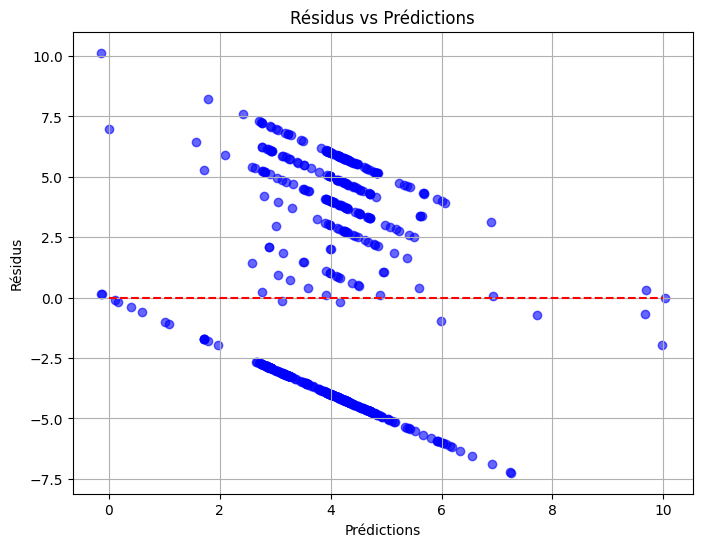

In [18]:
residuals = y_test - y_pred

# Visualisation des résidus
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.hlines(y=0, xmin=0, xmax=10, color='red', linestyle='--')  # Ligne horizontale à zéro
plt.title("Résidus vs Prédictions")
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

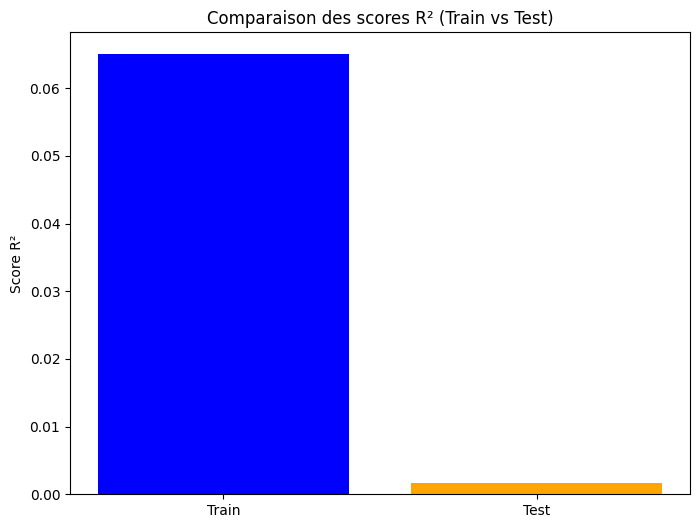

In [19]:
# Calcul des scores R²
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Visualisation des scores
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [train_score, test_score], color=['blue', 'orange'])
plt.title("Comparaison des scores R² (Train vs Test)")
plt.ylabel("Score R²")
plt.show()
